#### Import tensorflow and other libraries, then check the version

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

#### Import and load fashon MNIST dataset

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### The class names are not included with the dataset, store them here to use later when plotting the images

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Show that there are 60,000 images in the training set, with each image represented as 28 x 28 pixels

In [9]:
train_images.shape

(60000, 28, 28)

#### Show there are 60,000 labels in the training set

In [10]:
len(train_labels)

60000

#### Show each label is an integer between 0 and 9

In [11]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Same as test images

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
len(test_labels)

10000

#### Preprocess the data

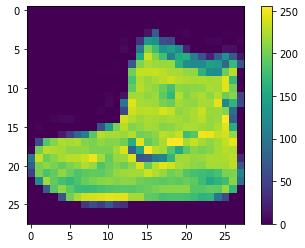

In [14]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#### Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#### To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

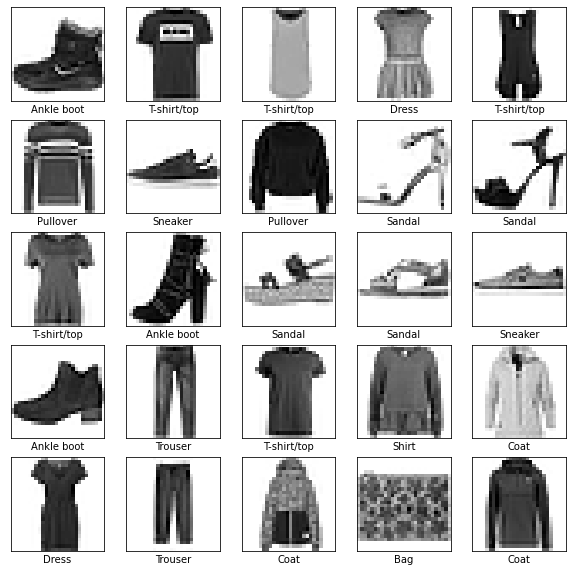

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Build a model - setup the layers

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

#### Compile the model

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train the model

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6353 - accuracy: 0.7753
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3857 - accuracy: 0.8614
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3445 - accuracy: 0.8750
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3141 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2953 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2788 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2694 - accuracy: 0.8986
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2553 - accuracy: 0.9063
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2535 - accuracy: 0.9054
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.234

#### Compare how the model performs on the test dataset, check the test accuracy

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3350 - accuracy: 0.8824

Test accuracy: 0.8823999762535095


####  Make predictions about some images

In [1]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

NameError: name 'tf' is not defined

In [22]:
predictions = probability_model.predict(test_images)

####  Take a look at the first prediction

In [23]:
predictions[0]

array([1.0500401e-05, 4.1158943e-09, 2.9968376e-08, 1.4548084e-09,
       7.7401701e-06, 5.8105895e-03, 1.4605652e-07, 3.5943133e-03,
       1.0903085e-06, 9.9057555e-01], dtype=float32)

#### You can see which label has the highest confidence value

In [24]:
np.argmax(predictions[0])

9

In [25]:
test_labels[0]

9

#### look at the full set of 10 class predictions

In [26]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

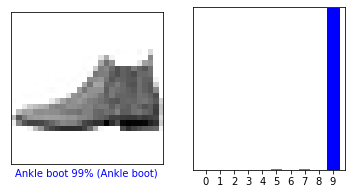

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

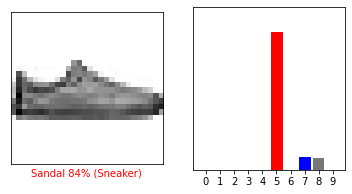

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

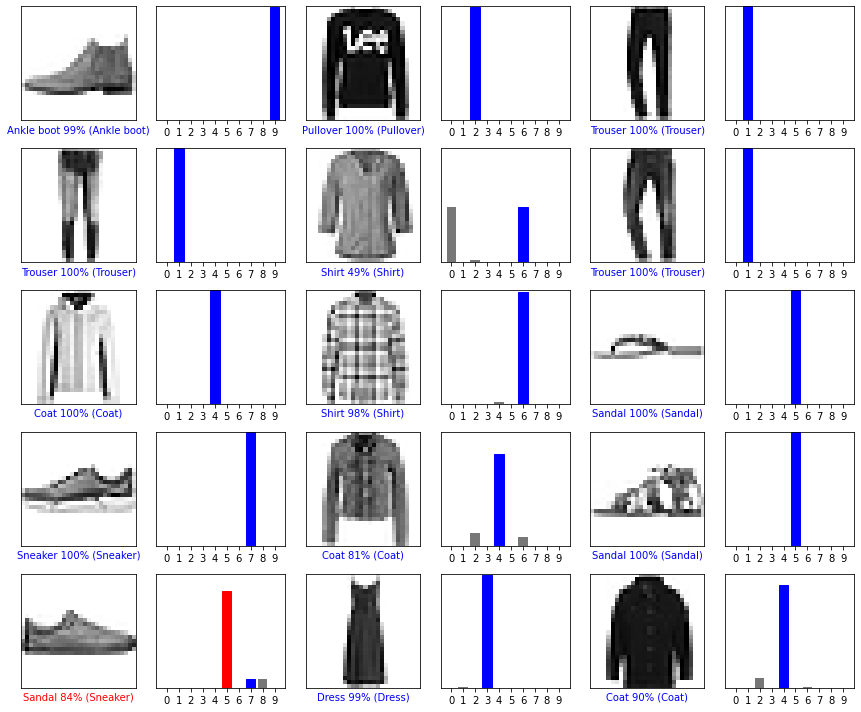

In [29]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

####  use the trained model to make a prediction about a single image

In [30]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [31]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.7165894e-04 2.6427357e-13 9.9756962e-01 1.1332470e-10 1.0745004e-04
  5.2601310e-09 1.9512780e-03 6.7648582e-12 9.3588248e-10 9.4319246e-13]]


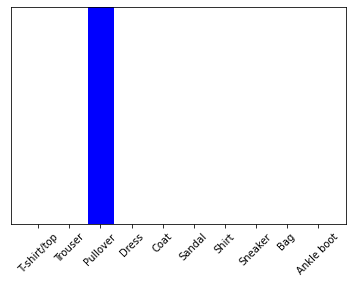

In [33]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [1]:
np.argmax(predictions_single[0])

NameError: name 'np' is not defined

In [2]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

## complete

## Complete